# Reading overlapping tiles with `georeader`

This tutorial shows how to read overlapping parts of two raster objects of different spatial resolution and with different transforms.

For this tutorial we will use a GeoTIFF file derived from an AVIRIS-NG image that we downloaded from [here](https://zenodo.org/record/5610307#.Yp83JhxBzRZ) and a Sentinel-2 file SAFE file that can be read directly from the public GCP bucket (or downloaded from [Copernicus SciHub](https://scihub.copernicus.eu/dhus)).

Step 1: Create the reader object for the AVIRIS image

In [1]:
%%time

from georeader.rasterio_reader import RasterioReader

# reader = RasterioReader("gs://starcop/Permian/permian_2019_official/ang20190928t185111-4_r6871_c424_rgb.tif")
aviris_reader = RasterioReader("ang20190928t185111-4_r6871_c424_rgb.tif")
aviris_reader

CPU times: user 498 ms, sys: 358 ms, total: 856 ms
Wall time: 228 ms


 
         Paths: ['ang20190928t185111-4_r6871_c424_rgb.tif']
         Transform: | 5.99, 4.35, 592577.80|
| 4.35,-5.99, 3519916.50|
| 0.00, 0.00, 1.00|
         Shape: (3, 151, 151)
         Resolution: (7.400000000000001, 7.400000000000001)
         Bounds: (592577.7996484624, 3519012.5018222863, 594138.5864788886, 3520573.2886527125)
         CRS: EPSG:32613
         nodata: None
         fill_value_default: 0
        

In [2]:
%%time

aviris_reader_in_memory = aviris_reader.load()
aviris_reader_in_memory.values

CPU times: user 5.14 ms, sys: 424 µs, total: 5.57 ms
Wall time: 3.98 ms


array([[[253, 254, 237, ..., 187, 181, 134],
        [231, 221, 199, ..., 203, 197, 164],
        [193, 194, 194, ..., 212, 202, 193],
        ...,
        [ 90,  88,  88, ..., 183, 160, 170],
        [ 92,  95,  95, ..., 192, 172, 181],
        [ 88,  93,  89, ..., 194, 187, 210]],

       [[235, 230, 213, ..., 172, 165, 131],
        [216, 203, 181, ..., 185, 180, 153],
        [184, 178, 177, ..., 189, 182, 178],
        ...,
        [ 96,  96,  96, ..., 183, 162, 171],
        [ 99, 100, 100, ..., 191, 173, 181],
        [ 97,  98,  96, ..., 193, 185, 205]],

       [[190, 183, 163, ..., 148, 141, 116],
        [174, 165, 142, ..., 151, 152, 129],
        [151, 145, 143, ..., 148, 147, 148],
        ...,
        [102, 101, 100, ..., 166, 149, 155],
        [103, 104, 103, ..., 173, 158, 163],
        [102, 102, 100, ..., 175, 167, 180]]], dtype=uint8)

Step 2: Create the reader object for the Sentinel-2 image

In [3]:
%%time

import os
from georeader.readers import S2_SAFE_reader
# This is required to read S2 images from the public GCP
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/home/gonzalo/Downloads/cs-starcop-dtacs-620b59dd7276.json"
os.environ["GS_USER_PROJECT"] = "cs-starcop-dtacs"

# Read only RGB bands

s2path = "gs://gcp-public-data-sentinel-2/tiles/13/S/ER/S2B_MSIL1C_20190928T173109_N0208_R055_T13SER_20190928T205958.SAFE"
s2_reader = S2_SAFE_reader.s2loader(s2path, out_res=10, bands=["B04", "B03", "B02"])
s2_reader

CPU times: user 256 ms, sys: 18.4 ms, total: 274 ms
Wall time: 602 ms


 
         gs://gcp-public-data-sentinel-2/tiles/13/S/ER/S2B_MSIL1C_20191008T173219_N0208_R055_T13SER_20191008T204555.SAFE
         Transform: | 10.00, 0.00, 499980.00|
| 0.00,-10.00, 3600000.00|
| 0.00, 0.00, 1.00|
         Shape: (3, 10980, 10980)
         Resolution: (10.0, 10.0)
         Bounds: (499980.0, 3490200.0, 609780.0, 3600000.0)
         CRS: EPSG:32613
         bands: ['B04', 'B03', 'B02']
         fill_value_default: 0
        

## Read the S2 image at the AVIRIS location using `read_from_bounds`

In [4]:
%%time

from georeader import read

s2_at_aviris_loc = read.read_from_bounds(s2_reader, aviris_reader_in_memory.bounds, crs_bounds=aviris_reader_in_memory.crs)
s2_at_aviris_loc

CPU times: user 8.76 ms, sys: 1.44 ms, total: 10.2 ms
Wall time: 10.7 ms


 
         gs://gcp-public-data-sentinel-2/tiles/13/S/ER/S2B_MSIL1C_20191008T173219_N0208_R055_T13SER_20191008T204555.SAFE
         Transform: | 10.00, 0.00, 592570.00|
| 0.00,-10.00, 3520580.00|
| 0.00, 0.00, 1.00|
         Shape: (3, 157, 157)
         Resolution: (10.0, 10.0)
         Bounds: (592570.0, 3519010.0, 594140.0, 3520580.0)
         CRS: EPSG:32613
         bands: ['B04', 'B03', 'B02']
         fill_value_default: 0
        

In [5]:
%%time
s2_at_aviris_loc_in_memory = s2_at_aviris_loc.load()
s2_at_aviris_loc_in_memory.values

CPU times: user 1.57 s, sys: 267 ms, total: 1.84 s
Wall time: 38.3 s


array([[[3053, 3099, 3092, ..., 3831, 3737, 3536],
        [3058, 3076, 3137, ..., 3951, 3884, 3646],
        [3108, 3059, 3078, ..., 3783, 3750, 3631],
        ...,
        [1871, 1884, 1928, ..., 2785, 2793, 2827],
        [1808, 1836, 1972, ..., 2906, 2853, 2850],
        [1819, 1854, 1975, ..., 2861, 2708, 2763]],

       [[2446, 2440, 2458, ..., 3051, 2946, 2856],
        [2424, 2409, 2464, ..., 3165, 3128, 2958],
        [2480, 2420, 2456, ..., 3026, 2974, 2890],
        ...,
        [1749, 1778, 1793, ..., 2301, 2386, 2395],
        [1727, 1773, 1873, ..., 2392, 2367, 2360],
        [1747, 1803, 1874, ..., 2430, 2312, 2311]],

       [[2194, 2205, 2197, ..., 2677, 2693, 2576],
        [2177, 2191, 2208, ..., 2821, 2782, 2617],
        [2222, 2204, 2224, ..., 2658, 2638, 2590],
        ...,
        [1764, 1803, 1857, ..., 2180, 2184, 2214],
        [1778, 1803, 1909, ..., 2226, 2200, 2187],
        [1795, 1826, 1928, ..., 2243, 2151, 2136]]], dtype=uint16)

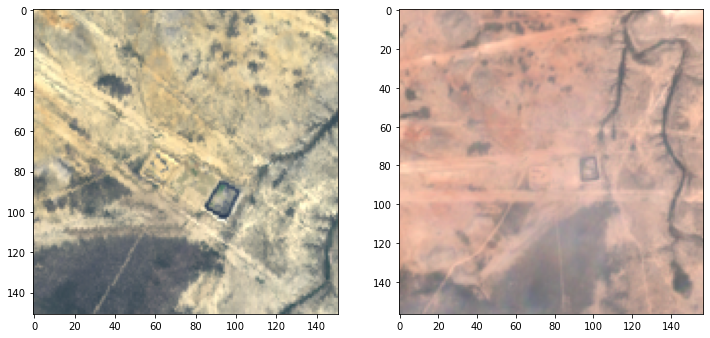

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(aviris_reader_in_memory.values.transpose((1,2,0)))
ax[1].imshow(np.clip(s2_at_aviris_loc_in_memory.values/3_500,0,1).transpose((1,2,0)))

## Read the S2 image at the AVIRIS location using `read_from_center_coords`

In [7]:
center_coords_aviris = aviris_reader_in_memory.transform * (aviris_reader_in_memory.shape[1] / 2, aviris_reader_in_memory.shape[0] / 2)
center_coords_aviris

(593036.3218595202, 3520235.9129436193)

In [8]:
%%time


s2_at_aviris_loc = read.read_from_center_coords(s2_reader, shape=(150,150),
                                                center_coords=center_coords_aviris, crs_center_coords=aviris_reader_in_memory.crs)
s2_at_aviris_loc

CPU times: user 7.71 ms, sys: 0 ns, total: 7.71 ms
Wall time: 7.64 ms


 
         gs://gcp-public-data-sentinel-2/tiles/13/S/ER/S2B_MSIL1C_20191008T173219_N0208_R055_T13SER_20191008T204555.SAFE
         Transform: | 10.00, 0.00, 592290.00|
| 0.00,-10.00, 3520990.00|
| 0.00, 0.00, 1.00|
         Shape: (3, 150, 150)
         Resolution: (10.0, 10.0)
         Bounds: (592290.0, 3519490.0, 593790.0, 3520990.0)
         CRS: EPSG:32613
         bands: ['B04', 'B03', 'B02']
         fill_value_default: 0
        

In [9]:
%%time
s2_at_aviris_loc_in_memory = s2_at_aviris_loc.load()
s2_at_aviris_loc_in_memory.values

CPU times: user 834 ms, sys: 0 ns, total: 834 ms
Wall time: 145 ms


array([[[2872, 3064, 3015, ..., 2815, 2891, 2819],
        [2768, 2840, 2870, ..., 2841, 2855, 2711],
        [2860, 2847, 2802, ..., 2873, 2838, 2844],
        ...,
        [2924, 2865, 2761, ..., 2840, 2796, 2829],
        [2913, 2774, 2764, ..., 2927, 2780, 2752],
        [2860, 2814, 2860, ..., 2946, 2744, 2728]],

       [[2386, 2509, 2569, ..., 2355, 2358, 2349],
        [2329, 2366, 2419, ..., 2372, 2367, 2342],
        [2348, 2302, 2350, ..., 2432, 2367, 2371],
        ...,
        [2297, 2231, 2199, ..., 2403, 2347, 2385],
        [2271, 2185, 2150, ..., 2446, 2341, 2344],
        [2233, 2190, 2194, ..., 2506, 2338, 2317]],

       [[2171, 2317, 2311, ..., 2155, 2181, 2146],
        [2105, 2144, 2193, ..., 2139, 2142, 2091],
        [2121, 2109, 2093, ..., 2174, 2163, 2159],
        ...,
        [1982, 1937, 1905, ..., 2308, 2272, 2290],
        [1991, 1916, 1850, ..., 2353, 2248, 2256],
        [1957, 1901, 1892, ..., 2368, 2274, 2212]]], dtype=uint16)

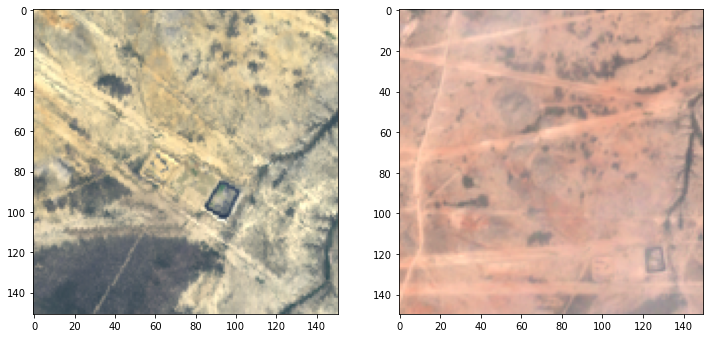

In [10]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(aviris_reader_in_memory.values.transpose((1,2,0)))
ax[1].imshow(np.clip(s2_at_aviris_loc_in_memory.values/3_500,0,1).transpose((1,2,0)))

## Read the S2 image at the AVIRIS location using `read_reproject_like`

This will read the S2 image with the same resolution and transform as the AVIRIS image.

In [11]:
%%time

s2_at_aviris_loc = read.read_reproject_like(s2_reader, aviris_reader_in_memory)
s2_at_aviris_loc

CPU times: user 838 ms, sys: 5.69 ms, total: 844 ms
Wall time: 160 ms


 
         Transform: | 5.99, 4.35, 592577.80|
| 4.35,-5.99, 3519916.50|
| 0.00, 0.00, 1.00|
         Shape: (3, 151, 151)
         Resolution: (7.400000000038687, 7.399999999944504)
         Bounds: (592577.7996484624, 3519012.5018222863, 594138.5864788886, 3520573.2886527125)
         CRS: EPSG:32613
         fill_value_default: 0
        

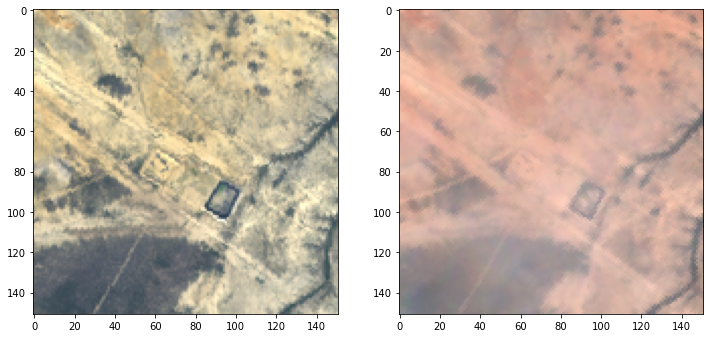

In [14]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(aviris_reader_in_memory.values.transpose((1,2,0)))
ax[1].imshow(np.clip(s2_at_aviris_loc.values/3_500,0,1).transpose((1,2,0)))

## Read the S2 image at the AVIRIS location using `read_reproject`

With this we will show how to reproject the S2 image to the AVIRIS grid but keeping the original spatial resolution of Sentinel-2 (10m).

In [22]:
%%time
import rasterio.windows
from math import ceil

shape_out = ceil(aviris_reader_in_memory.shape[1] * aviris_reader_in_memory.res[0] / s2_reader.res[0]), ceil(aviris_reader_in_memory.shape[2] * aviris_reader_in_memory.res[1] / s2_reader.res[1])

s2_at_aviris_loc = read.read_reproject(s2_reader, dst_crs=aviris_reader_in_memory.crs, 
                                       dst_transform=aviris_reader_in_memory.transform,
                                       resolution_dst_crs=s2_reader.res,
                                       window_out=rasterio.windows.Window(0,0, width=shape_out[-1], height=shape_out[-2]))
s2_at_aviris_loc

CPU times: user 856 ms, sys: 6.66 ms, total: 863 ms
Wall time: 157 ms


 
         Transform: | 8.09, 5.88, 592577.80|
| 5.88,-8.09, 3519916.50|
| 0.00, 0.00, 1.00|
         Shape: (3, 112, 112)
         Resolution: (9.999999999910532, 10.000000000141569)
         Bounds: (592577.7996484624, 3519010.398378094, 594142.2181647301, 3520574.816894365)
         CRS: EPSG:32613
         fill_value_default: 0
        

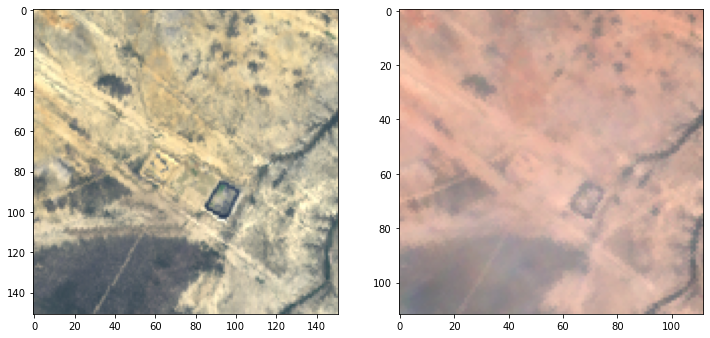

In [23]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(aviris_reader_in_memory.values.transpose((1,2,0)))
ax[1].imshow(np.clip(s2_at_aviris_loc.values/3_500,0,1).transpose((1,2,0)))

## Downscale AVIRIS-NG to the Sentinel-2 resolution (10m)

This AVIRIS-NG image is at 7.40m resolution and we'd like to convert it to 10m resolution. We will set the option anti_aliasing to True to avoid aliasing efects of reducing the sampling size.

In [24]:
avirs_at_10m = read.resize(aviris_reader_in_memory,resolution_dst=s2_reader.res,anti_aliasing=True)
avirs_at_10m

 
         Transform: | 8.09, 5.88, 592577.80|
| 5.88,-8.09, 3519916.50|
| 0.00, 0.00, 1.00|
         Shape: (3, 112, 112)
         Resolution: (9.999999999910532, 10.000000000141569)
         Bounds: (592577.7996484624, 3519010.398378094, 594142.2181647301, 3520574.816894365)
         CRS: EPSG:32613
         fill_value_default: 0
        

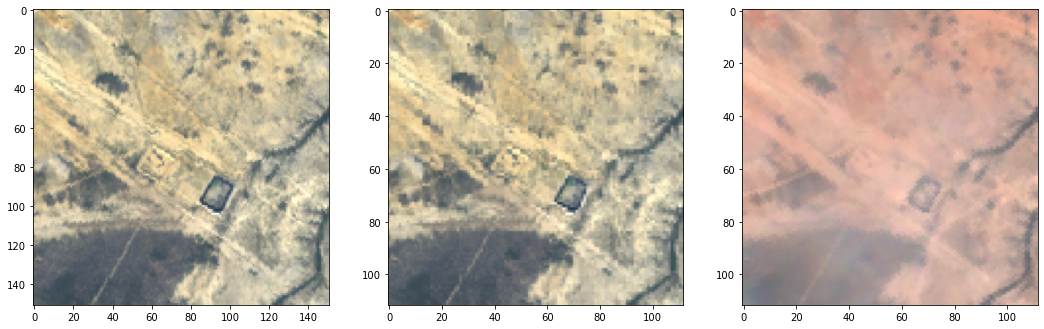

In [26]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
ax[0].imshow(aviris_reader_in_memory.values.transpose((1,2,0)))
ax[1].imshow(avirs_at_10m.values.transpose((1,2,0)))
ax[2].imshow(np.clip(s2_at_aviris_loc.values/3_500,0,1).transpose((1,2,0)))